In [15]:
import pandas
import numpy
import matplotlib.pyplot as plt

In [16]:
def clean_data(x):
    x = x.replace(' ', '')
    if( x.isalpha() == True):
        return x
    if (x.isnumeric() == False):
        return numpy.NaN
    else:
        return int (x)

In [17]:
def filter_data(source, start, end):
    data = pandas.read_csv("Data\\" + source)
    data = data.rename(str.strip, axis = 'columns')
    data = data.set_index('Country')
    for colname in data.columns:
        if not (colname.isnumeric()):
            data = data.drop( columns = colname )
    # Let's clean the data
    data = data.applymap(clean_data).dropna().transpose()
    data = data.truncate(start, end)
    return data

In [18]:
data = []
start = '1990' 
end = '2016'
data.append(filter_data('AIDS-related deaths_Number of AIDS-related deaths_Population_ All ages.csv', start, end))
data.append(filter_data('New HIV infections_Number of new HIV infections_Population_ All ages.csv', start, end))
data.append(filter_data('People living with HIV_Number of people living with HIV_Population_ All ages.csv', start, end))

In [19]:
data[2]['India']

1990     160000.0
1991     250000.0
1992     380000.0
1993     540000.0
1994     740000.0
1995     960000.0
1996    1200000.0
1997    1400000.0
1998    1700000.0
1999    1900000.0
2000    2000000.0
2001    2100000.0
2002    2200000.0
2003    2300000.0
2004    2300000.0
2005    2300000.0
2006    2300000.0
2007    2200000.0
2008    2200000.0
2009    2200000.0
2010    2200000.0
2011    2100000.0
2012    2100000.0
2013    2100000.0
2014    2100000.0
2015    2100000.0
2016    2100000.0
Name: India, dtype: float64

In [20]:
death_x = list(range(1990, 2017))
death_y = list(data[0]['India'])
death_equation = numpy.polyfit(death_x, death_y, 4)
death_equation_ = numpy.poly1d(death_equation)

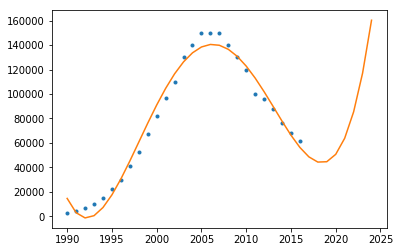

In [21]:
plt.plot(death_x, death_y, '.', list(range(1990, 2025)), death_equation_(list(range(1990, 2025))))
plt.show()

In [22]:
print(death_equation_)

       4             3             2
3.955 x - 3.173e+04 x + 9.546e+07 x - 1.276e+11 x + 6.399e+13


In [23]:
new_x = list(range(1990, 2017))
new_y = list(data[1]['India'])
new_equation = numpy.polyfit(new_x, new_y, 4)
new_equation_ = numpy.poly1d(new_equation)

In [24]:
new_equation_(2024)

79105.4375

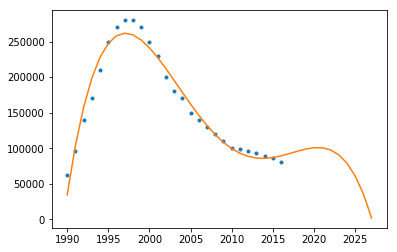

In [27]:
plt.plot(new_x, new_y, '.', list(range(1990, 2028)), new_equation_(list(range(1990, 2028))))
plt.savefig('New Infections Predicion')
plt.show()

In [20]:
print(new_equation_)

        4             3             2
-3.766 x + 3.028e+04 x - 9.132e+07 x + 1.224e+11 x - 6.151e+13


In [6]:
total_x = list(range(1990, 2017))
total_y = list(data[2]['India'])
total_equation = numpy.polyfit(total_x, total_y, 5)
total_equation_ = numpy.poly1d(total_equation)

In [7]:
print(total_equation_)

        5             4            3             2
-2.534 x + 2.542e+04 x - 1.02e+08 x + 2.046e+11 x - 2.053e+14 x + 8.237e+16


In [8]:
total_equation_(2024)

698592.0

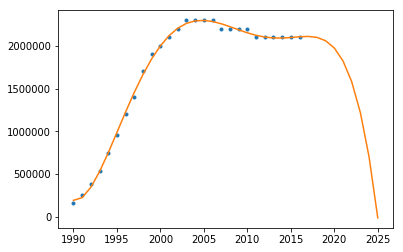

In [13]:
plt.plot(total_x, total_y, '.', list(range(1990, 2026)), total_equation_(list(range(1990, 2026))))
plt.savefig('Population')
plt.show()